![title](./images/es5.26-1.png)
![title](./images/es5.26-2.png)

![title](./images/es5.1.png)

# SOLUZIONE
## (i) Disegna la condensazione del digramma associato.
Di seguito il grafo associato alla matrice:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def disegna_digrafo_da_matrice_adiacenza_stocastica(matrice_adiacenza):
    # Ottieni l'ordine numerico dei nodi
    ordine_nodi = list(range(len(matrice_adiacenza)))

    # Creiamo il digrafo partendo dalla matrice di adiacenza
    G = nx.DiGraph(matrice_adiacenza)

    # Imposta l'ordine dei nodi nel digrafo
    G = nx.relabel_nodes(G, dict(zip(G.nodes(), ordine_nodi)))

    # Disegniamo il grafico
    pos = nx.spring_layout(G)  # posizione per tutti i nodi
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

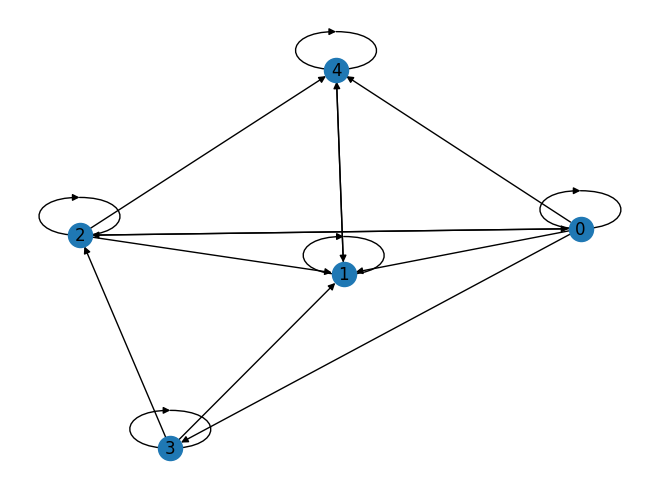

In [2]:
adj_matrix = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

disegna_digrafo_da_matrice_adiacenza_stocastica(adj_matrix)

Plot del digrafo condensato usando la libreria NetworkX:

In [3]:
def grafo_di_condensazione(matrice_adiacenza):
    # Creazione di un grafo diretto dalla matrice di adiacenza
    G = nx.from_numpy_array(matrice_adiacenza, create_using=nx.DiGraph)

    # Calcolo dei componenti fortemente connessi
    scc = nx.strongly_connected_components(G)

    # Creazione del grafo di condensazione
    condensazione = nx.condensation(G, scc)

    return condensazione

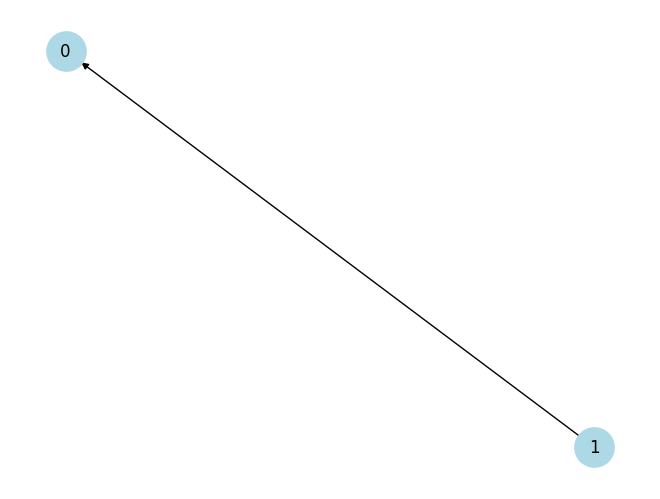

In [4]:
# Matrice di adiacenza fornita
matrice_adiacenza = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

# Generazione del grafo di condensazione
condensazione = grafo_di_condensazione(matrice_adiacenza)

# Disegno del grafo di condensazione
nx.draw(condensazione, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
plt.show()

Di seguito il plot eseguito con il codice fornito da Bullo:

In [5]:
def plot_condensated_graph(G, axs3):
    """
    :param G: Digraph to be condensed
    :param axs3: 1 dim axs with at least 3 subplots locations
    """
    
    # Visualize initial digraph
    Gpos = nx.spring_layout(G)
    nx.draw_networkx(G, Gpos, node_size=40, ax=axs3[0], connectionstyle='arc3, rad = 0.2', with_labels=False)
    
    # Algorithm to compute the condensed digraph:
    G_conden = nx.algorithms.components.condensation(G)
    
    all_col = []
    # Compute coloring scheme for the condensed graph
    for u, node in G_conden.nodes(data=True):
        sg = node['members']
        co = np.random.rand(1,3)
        all_col.append(co)
    nx.draw_networkx_nodes(G.subgraph(sg), Gpos, node_size=40, node_color=co, ax=axs3[1])
    nx.draw_networkx_edges(G, Gpos, edgelist=G.edges(sg), edge_color=co, ax=axs3[1], connectionstyle='arc3, rad = 0.2')
    
    nx.draw_networkx(G_conden, node_size=40, ax=axs3[2], node_color=all_col, connectionstyle='arc3, rad = 0.2', with_labels=False)
    axs3[0].set_xlabel("Original digraph")
    axs3[1].set_xlabel("Strongly connected components")
    axs3[2].set_xlabel("Condensed digraph")

In [6]:
def generate_graph_from_adjacency(adj_matrix):
    """
    Generate a directed graph from an adjacency matrix.
    """
    G = nx.DiGraph()
    num_nodes = adj_matrix.shape[0]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i][j] != 0:
                G.add_edge(i, j)
    return G

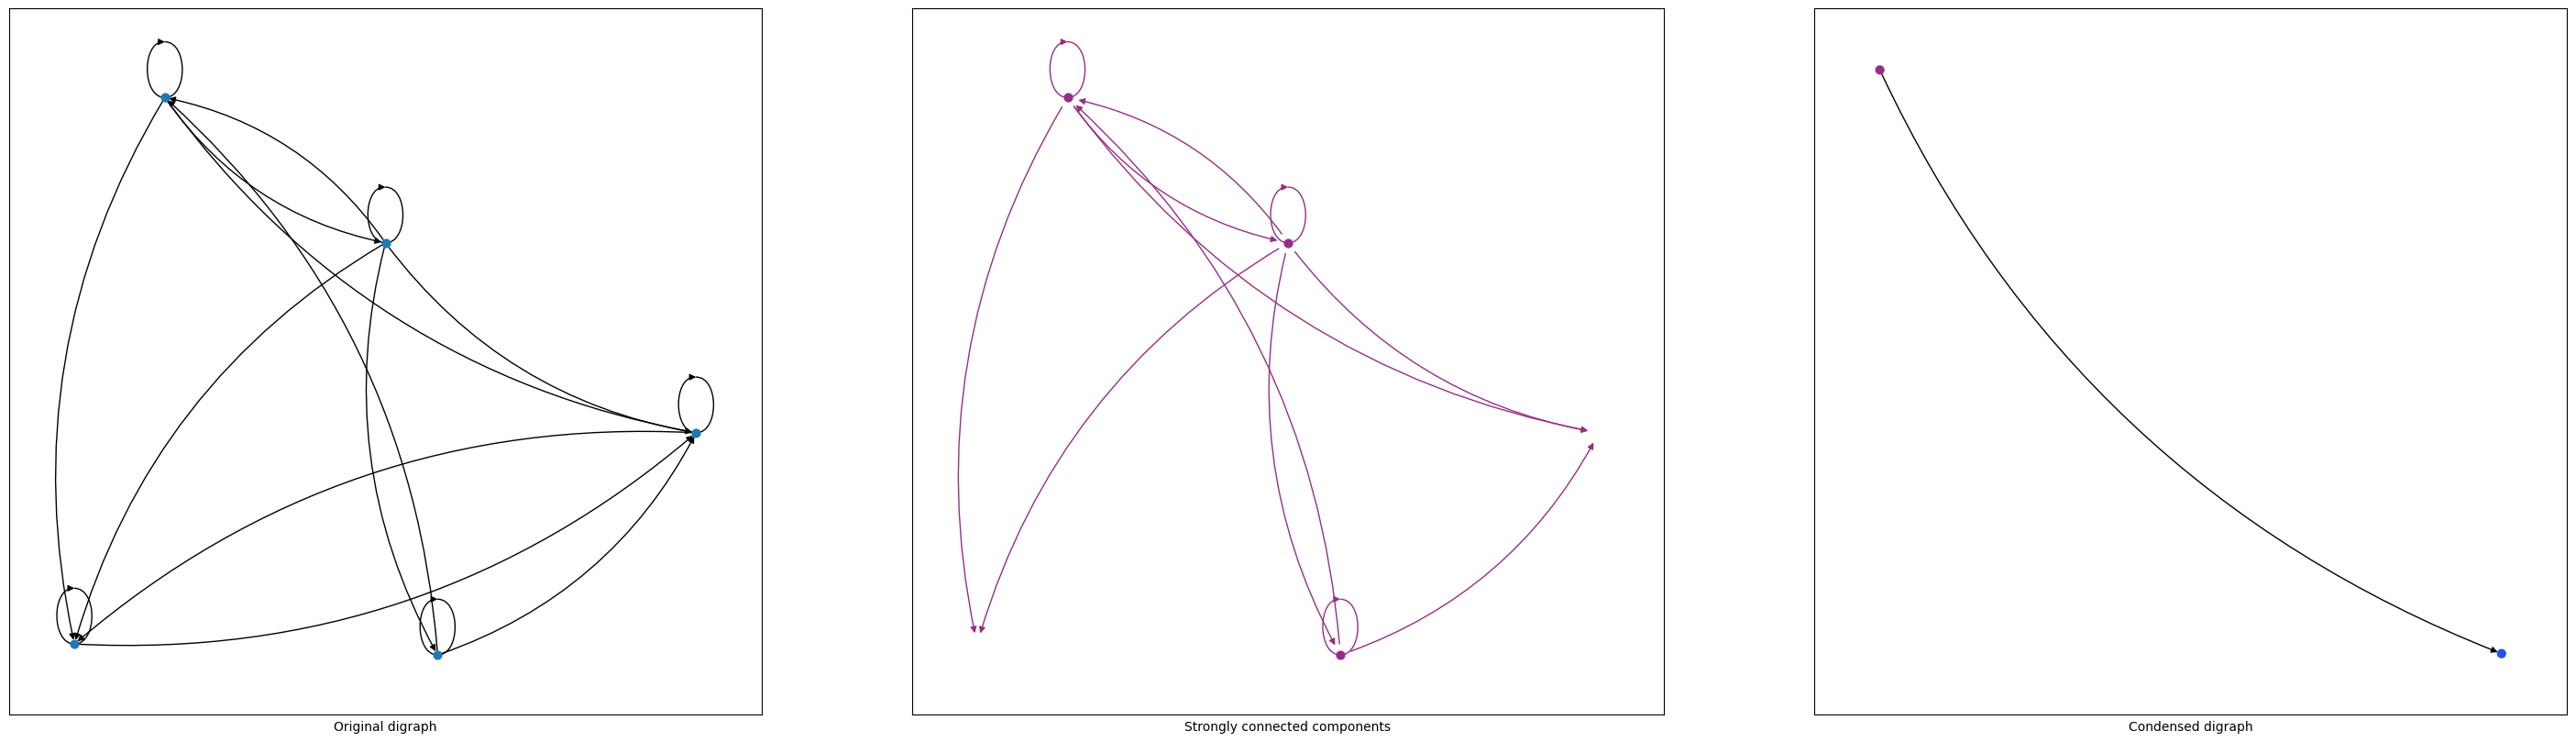

In [7]:
myfs= (30, 10)
fig, axs343 = plt.subplots(1, 3, figsize=(myfs[0]*1.2, myfs[1]))

# Given adjacency matrix
adj_matrix = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

# Generate the graph from the adjacency matrix
G_from_adj_matrix = generate_graph_from_adjacency(adj_matrix)

# Plot the condensed graph
plot_condensated_graph(G_from_adj_matrix, axs343)
plt.show()


Ricordiamo che i componenti fortemente connessi possono essere pensati come cicli autonomi all'interno di un grafo diretto dove ogni vertice in a dato ciclo può essere raggiunto da ogni altro vertice nello stesso ciclo:

![title](./images/strongly_connected_components.png)

Il valore di collegamento basso di un nodo è il più piccolo ID nodo [più basso] raggiungibile da quel nodo quando si esegue un DFS (incluso se stesso). Per il nodo 1 ad esempio avremo:

![title](./images/low_link_values.png)

Quindi l'esempio completo seguente avrà i seguenti node id:

![title](./images/low_link_values_complete.png)

Queste info risultano utili nel momento in cui ad esempio si applica l'algoritmo di Tarjan.
L'algoritmo di Tarjan è un algoritmo per trovare tutti i componenti fortemente connessi (SCC) in un grafo diretto. Un componente fortemente connesso è un sottoinsieme massimale di nodi in cui ogni coppia di nodi è raggiungibile dall'altro. In altre parole, è un insieme di nodi in cui esiste un percorso da ogni nodo ad ogni altro nodo all'interno del componente.

Ecco una spiegazione passo per passo dell'algoritmo di Tarjan:

* Inizializzazione: Si inizia dalla scelta di un nodo non ancora visitato e si avvia una DFS (Depth-First Search) da quel nodo. Durante la DFS, si assegnano a ciascun nodo due valori:
    - Il tempo di scoperta (o "discovery time"), che rappresenta l'ordine in cui il nodo è stato visitato durante la DFS.
    - Il valore di collegamento basso (o "low link"), che rappresenta il nodo con il tempo di scoperta più basso raggiungibile dal nodo corrente durante la DFS.

* Ricerca ricorsiva: Durante la DFS, vengono visitati i nodi adiacenti non ancora visitati. Se viene trovato un nodo non ancora visitato, viene avviata una nuova DFS da quel nodo. Durante questa ricerca ricorsiva, i nodi visitati vengono aggiunti a una pila.

* Aggiornamento del valore di collegamento basso: Durante il ritorno dalla DFS ricorsiva, il valore di collegamento basso del nodo corrente viene aggiornato. Questo valore viene aggiornato con il valore di collegamento basso dei nodi adiacenti già visitati.

* Identificazione dei componenti fortemente connessi: Quando il valore di collegamento basso di un nodo coincide con il suo tempo di scoperta, significa che il nodo è la radice di un componente fortemente connesso. A questo punto, tutti i nodi nella pila fino a quel nodo (compreso) formano un componente fortemente connesso. Vengono quindi rimossi dalla pila e il processo continua fino a quando non sono stati identificati tutti i componenti fortemente connessi nel grafo.

* Complessità: L'algoritmo di Tarjan ha una complessità temporale di O(V + E), dove V è il numero di nodi e E è il numero di archi nel grafo.

L'algoritmo di Tarjan è ampiamente utilizzato per trovare i componenti fortemente connessi in grafi diretti, ed è efficiente anche su grafi di grandi dimensioni. È una tecnica fondamentale nell'analisi dei grafi e viene utilizzata in molte applicazioni, come la compilazione del codice, il rilevamento delle dipendenze nel software e molto altro ancora.

Questo è particolarmente utile per trovare i grafi condensati, poiché identifica tutti i componenti fortemente connessi (SCC) in un grafo diretto. I grafi condensati sono costituiti dai nodi dei componenti fortemente connessi come nodi e dagli archi tra i componenti fortemente connessi come archi nel grafo condensato.

Ecco come l'algoritmo di Tarjan può essere utilizzato per trovare i grafi condensati:

* Identificazione dei componenti fortemente connessi: L'algoritmo di Tarjan esplora il grafo e identifica tutti i componenti fortemente connessi. Ogni componente fortemente connesso è identificato come un insieme di nodi che possono raggiungersi tra loro attraverso una serie di archi diretti.

* Costruzione del grafo condensato: Dopo aver identificato tutti i componenti fortemente connessi, è possibile costruire il grafo condensato. In questo grafo, ogni componente fortemente connesso viene rappresentato come un singolo nodo, e gli archi tra i componenti fortemente connessi nel grafo originale diventano archi nel grafo condensato.

* Analisi del grafo condensato: Il grafo condensato può essere analizzato ulteriormente per estrarre informazioni sulla struttura e sulla connettività del grafo originale. Ad esempio, possiamo identificare i cicli nel grafo condensato, che corrispondono a cicli di lunghezza maggiore o uguale a due nel grafo originale.

In breve, l'algoritmo di Tarjan è uno strumento fondamentale per la ricerca dei grafi condensati, poiché consente di identificare in modo efficiente i componenti fortemente connessi nel grafo diretto e di costruire il grafo condensato basato su tali componenti.

Un riscontro manuale di seguito:

![title](./images/cond_graph_es5.1.png)

Condensandolo ci ritroviamo con quello generato dai codici sopra riportati.

## (ii) I relatori sono finalmente d’accordo su una decisione comune?
Sì, i relatori finalmente concordano su una decisione comune cioè $S_2=\{2,5\}$. 
E' possibile, inoltre, osservare l'assenza di stubborn agents.
Di seguito lo verifichiamo.

In [8]:
#definisco la funzione che calcola l'average consensus
def compute_average_consensus(W, x0, num_iterations):
    #lim per k -> infinito di W^k * x(0)
    W_k = np.linalg.matrix_power(W, num_iterations*1000)
    result = np.dot(W_k, x0)
    print("POSSIBLE AVERAGE CONSENSUS: ")
    print(result)
    return result

In [9]:
#definisco la funzione per il french degroot model
def french_degroot_model(W, x0, num_iterations):
    """
     Modello di consenso French-DeGroot.

     parametri:
         W (numpy.ndarray): matrice di adiacenza che rappresenta l'influenza di un agente rispetto ad un altro. 
             La forma della matrice dovrebbe essere (n, n) dove n è il numero di agenti. 
             La voce (i, j) rappresenta l'influenza dell'agente j sull'agente i.
             I valori devono essere compresi tra 0 e 1 e la somma di ciascuna colonna deve essere 1.
         x0 (numpy.ndarray): opinioni iniziali degli agenti. Dovrebbe essere una matrice 1D di lunghezza n, dove n è il numero di agenti.
         num_iterations (int): numero di iterazioni per eseguire il modello.

     Ritorna:
         numpy.ndarray: opinioni di consenso finale dopo il numero specificato di iterazioni.
         numpy.ndarray: opinioni di ciascun agente ad ogni iterazione. Forma (num_iterazioni, n).
     """

    n = len(x0)
    opinions = x0.copy()
    opinions_history = [opinions.copy()]

    for _ in range(num_iterations):
        opinions = np.dot(W, opinions)
        opinions_history.append(opinions.copy())

    return opinions, np.array(opinions_history)

POSSIBLE AVERAGE CONSENSUS: 
[[0.64]
 [0.64]
 [0.64]
 [0.64]
 [0.64]]


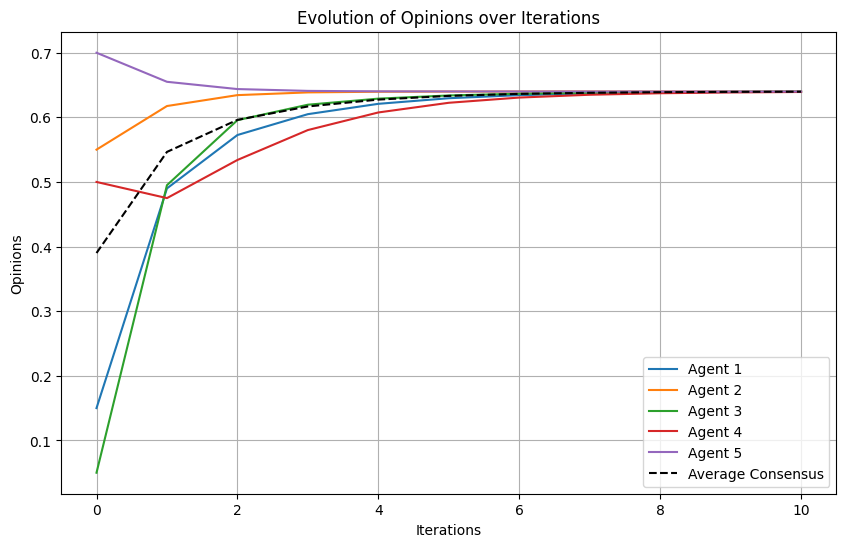

In [10]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([
    [0.15, 0.15, 0.1, 0.2, 0.4],
    [0, 0.55, 0, 0, 0.45],
    [0.3, 0.05, 0.05, 0, 0.6],
    [0, 0.4, 0.1, 0.5, 0],
    [0, 0.3, 0, 0, 0.7]
])

# Condizioni iniziali degli agenti
x0 = np.array([0.15, 0.55, 0.05, 0.5, 0.7]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

## (iii) In caso di accordo, il parere iniziale di qualche relatore viene rifiutato? Se sì, quali?
Si le opinioni iniziali dei relatori del set di nodi $S_1=\{1,3,4\}$

## (iv) Assumere che le opinioni iniziali dei relatori siano le loro autovalutazioni (ovvero, i pesi propri $a_{11}$,..., $a_{55}$) e calcolare il giudizio finale tramite calcoli elementari.
Vedere l'average consensuns sopra calcolato dopo 10 iterazioni.

![title](./images/es5.2.png)

## (i)
In questo scenario, tutti danno lo stesso peso all’opinione di tutti, compresi se stessi.
Poiché tutti danno lo stesso peso agli altri, compresi se stessi, la matrice della media A avrà tutte le voci uguali a $1/n$​, dove n è il numero di individui.

$$ A = \frac{1}{n} \cdot \begin{pmatrix} 1 \ 1 \ \cdots \ 1 \\ 1 \ 1 \ \cdots \ 1 \\ \vdots \ \vdots \ \ddots \ \vdots \\ 1 \ 1 \ \cdots \ 1 \end{pmatrix} $$

POSSIBLE AVERAGE CONSENSUS: 
[[0.33333333]
 [0.33333333]
 [0.33333333]]


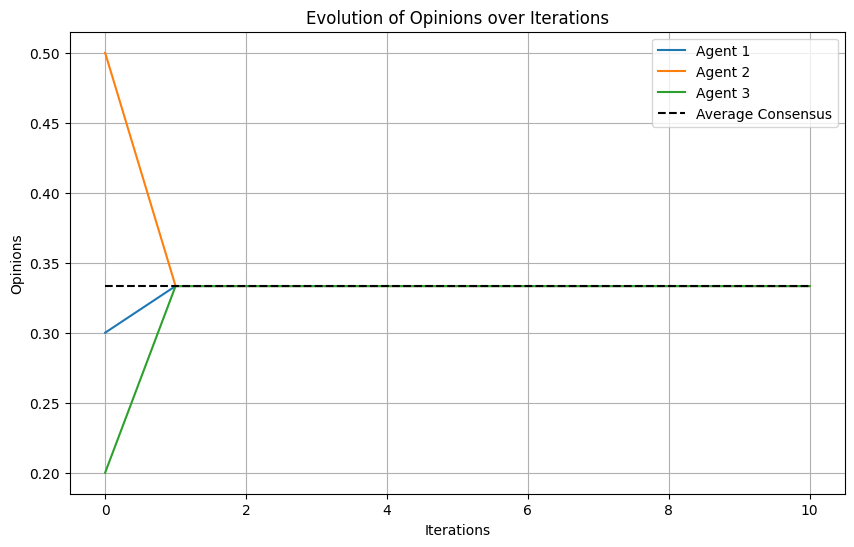

In [12]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.full((3, 3), 1/3)

# Condizioni iniziali degli agenti
x0 = np.array([0.3, 0.5, 0.2]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

## (ii)
L'individuo 1 attribuisce lo stesso peso alle opinioni sue e di tutti gli altri. Ogni individuo 2, . . . , n calcola la media tra la propria opinione e quella dell'individuo 1:

In questo scenario, la matrice della media A avrà la prima riga composta da 1/n per ciascun elemento, e ogni riga successiva avrà 1/2 per l'elemento corrispondente con il primo elemento pari a 1/2 (riflettendo il pari peso dato a l'opinione dell'individuo 1 e la propria) e il resto è 1/(2n) poiché l'opinione dell'individuo 1 ha lo stesso peso.

$$ A = \begin{bmatrix} 
\frac{1}{n} \ \frac{1}{n} \ \cdots \ \frac{1}{n} 
\\ \frac{1}{2} \ \frac{1}{2} \ \cdots \ 0 
\\ \vdots \ \vdots \ \ddots \ \vdots 
\\ \frac{1}{2} \ 0 \ \cdots \ \frac{1}{2} 
\end{bmatrix} $$

POSSIBLE AVERAGE CONSENSUS: 
[[0.32857143]
 [0.32857143]
 [0.32857143]]


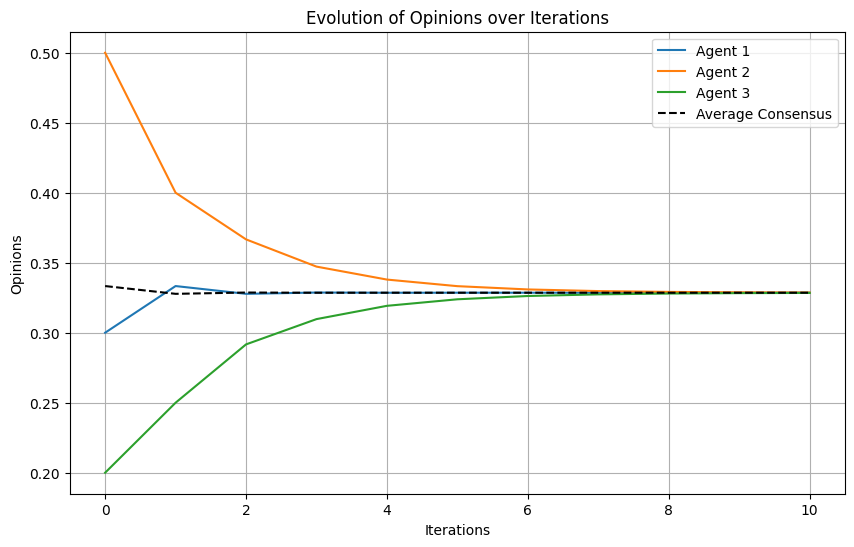

In [13]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[1/3, 1/3, 1/3], [1/2, 1/2, 0], [1/2, 0, 1/2]])

# Condizioni iniziali degli agenti
x0 = np.array([0.3, 0.5, 0.2]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

## (iii)
L'individuo 1 non cambia la sua opinione. Ogni individuo 2, . . . , n calcola la media tra la propria opinione e quella dell'individuo 1:

In questo scenario, la matrice della media A sarà simile allo scenario (ii), ma la prima riga sarà composta da 1 per il primo elemento e 0 per il resto poiché l'opinione dell'individuo 1 non cambia.

$$ A = \begin{bmatrix} 
1 \ 0 \ \cdots \ 0 
\\ \frac{1}{2} \ \frac{1}{2} \ \cdots \ 0 
\\ \vdots \ \vdots \ \ddots \ \vdots 
\\ \frac{1}{2} \ 0 \ \cdots \ \frac{1}{2} 
\end{bmatrix} $$

POSSIBLE AVERAGE CONSENSUS: 
[[0.3]
 [0.3]
 [0.3]]


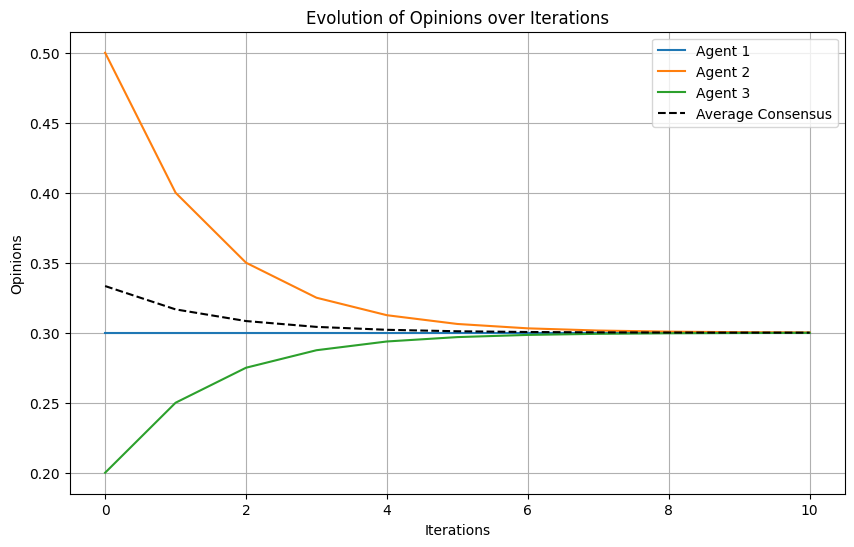

In [15]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[1, 0, 0], [1/2, 1/2, 0], [1/2, 0, 1/2]])

# Condizioni iniziali degli agenti
x0 = np.array([0.3, 0.5, 0.2]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 10

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

![title](./images/es5.5.png)

# Dimostrazione della proprietà della matrice equal-neighbor row-stocastica

## (i) Row-stocastico

Per dimostrare che $A_{\text{equal-nghbr}}$ è row-stocastico, dobbiamo provare che ogni riga somma a 1.

Per dimostrare questo per $A_{equal-nghbr}$, useremo la proprietà che per una matrice row-stocastica M, $M \times 1=1$, dove 1 è un vettore colonna di uno.

1. Semplificazione
   * Sappiamo che $I_n \times 1=1$ (la matrice identità moltiplicata per il vettore è uguale a uno).
   * $A \times 1=D_{out} \times 1$ (la somma dei pesi degli outgoing edge da ciascun nodo è uguale al suo weighted out-degree).
   * Perciò, $(I_n + A) \times 1=(I_n + D_{out}) \times 1$.

2. Inverso e trasformazione:
   * $(I_n + D_{out})^{-1}$ è l'inverso di una matrice che trasforma 1 in se stessa scalata per gli out-degress più 1.
   * Applicando $(I_n + D_{out})^{-1}$ a $(I_n + D_{out}) \times 1 $ essenzialmente inverte questa trasformazione, risultando di nuovo in 1.
  
$$ 
A_{equal-nghbr} \times 1=(I_n + D_{out})^{-1} \times (I_n + A) \times 1=1
$$

Ciò dimostra che ogni riga di $A_{equal-nghbr}$ somma a 1, rendendolo stocastico per righe.

### Alternativamente
Per dimostrare che $A_{\text{equal-nghbr}}$ è row-stocastico, dobbiamo provare che ogni riga somma a 1.

Sia $e_i$ il vettore base standard $i$-esimo (un vettore con un 1 nella posizione $i$-esima e 0 altrove), e sia $\mathbf{1}$ il vettore di tutti 1.

Quindi, per la $i$-esima riga di $A_{\text{equal-nghbr}}$, indicata come $(A_{\text{equal-nghbr}})_i$:

$$(A_{\text{equal-nghbr}})_i = (I_n + D_{\text{out}})^{-1}(I_n + A)e_i$$

Ora, nota che $(I_n + D_{\text{out}})^{-1}(I_n + A)$ è una matrice column-stocastica perché $(I_n + D_{\text{out}})$ è una matrice diagonale con le entrate diagonali che rappresentano i gradi di uscita, e $(I_n + A)$ rappresenta la matrice di adiacenza.

Moltiplicare una matrice column-stocastica per un vettore con entries che sommano a 1 (che è il caso di $e_i$) produce un vettore in cui ogni entrata è una combinazione convessa delle colonne della matrice, e quindi ogni entrata è non negativa e somma a 1.

Quindi, ogni riga di $A_{\text{equal-nghbr}}$ somma a 1, dimostrando che è row-stocastico.

## (ii) Primitivo se e solo se fortemente connesso

La matrice $A_{\text{equal-nghbr}}$ è primitiva se e solo se esiste un intero positivo $k$ tale che $(A_{\text{equal-nghbr}})^k$ abbia tutte le entries positive.

Il grafo $G$ è fortemente connesso se e solo se esiste un intero positivo $k$ tale che tutte le entries di $A^k$ siano positive, dove $A$ è la matrice di adiacenza di $G$.

Dal momento che $A_{\text{equal-nghbr}} = (I_n + D_{\text{out}})^{-1}(I_n + A)$, e $(I_n + D_{\text{out}})^{-1}$ e $(I_n + A)$ sono entrambi matrici non negative, se $G$ è fortemente connesso, allora $A_{\text{equal-nghbr}}$ è primitivo.

Viceversa, se $A_{\text{equal-nghbr}}$ è primitivo, allora esiste un intero positivo $k$ tale che $(A_{\text{equal-nghbr}})^k$ abbia tutte le entries positive. Dal momento che $(I_n + D_{\text{out}})^{-1}$ e $(I_n + A)$ sono matrici non negative, ciò implica che $(I_n + A)^k$ abbia tutte le entries positive. Quindi, $G$ è fortemente connesso.

Quindi ricapitolando:

Una matrice è primitiva se è non negativa ed esiste un $k>0$ tale che tutti gli elementi della matrice elevata a k sono strettamente positivi. Affinchè $A_{equal-nghbr}$ sia primitiva, significa che dev'esserci qualche k dove $(A_{equal-nghbr})^k$ ha tutti gli elementi positivi. Ciò indica l'esistenza di percorsi di lunghezza k tra due nodi qualsiasi del grafico.

* Connessione tra $A_{equal-nghbr}$ e G:
    * Se G è fortemente connesso, c'è un percorso tra due nodi qualsiasi.
    * Questo implica che per qualche k, tutti gli elementi di $(A_{equal-nghbr})^k$ saranno positivi. Percorsi di varia lunghezza possono essere combinati per raggiungere qualsiasi nodo da qualsiasi altro nodo in un grafo fortemente connesso. Ciò soddisfa la condizione affinchè $A_{equal-nghbr}$ sia primitiva.
* Implicazione inversa
    * Se $A_{equal-nghbr}$ è primitiva, allora per qualche k, $(A_{equal-nghbr})^k$ ha tutti gli elementi positivi.
    * Ciò indica che ci sono percorsi di lunghezza k (o meno) tra due nodi qualsiasi in G.
    * Pertanto G deve essere fortemente connesso.
 
In conclusione, $A_{equal-nghbr}$ è primitiva se e solo se G è fortemente connesso.

## (iii) Doppia stocastica se G è bilanciato e il grado ponderato è costante
Affinchè $A_{equal-nghbr}$ sia doppiamente stocastica, dobbiamo provare che $A \times 1 = D_{out} \times 1= D_{in} \times 1$ (la somma delle colonne somma a 1). 

* Weight-Balanced and Constant Weighted Degree:
    * Dato che G è weight-balanced e il grado ponderato è costante per tutti i nodi ($D_{out} = D_{in} = dI_n$ per qualche d>0), la somma dei pesi degli archi in entrata è uguale alla somma dei pesi degli archi in uscita per ciascun nodo.
* Uguaglianza di $A \times 1$ e $D_{in} \times 1$:
    * Poichè $D_out = D_{in}$, segue che $A \times 1$ (somma dei pesi degli outgoing edge da ciascun nodo) = $D_{out} \times 1$ (somma dei pesi di ciascun nodo) = $D_{in} \times 1$ (somma dei pesi che entrano in ciascun nodo).

In condizioni di weight-balanced e weighted degree costante, $A_{equal-nghbr}$ soddisfa sia le proprietà stocastiche di riga che quelle stocastiche di colonna, rendendolo doppiamente stocastico.

### Alternativamente

Se $G$ è bilanciato e il grado ponderato è costante per tutti i nodi, allora $D_{\text{out}} = D_{\text{in}} = dI_n$ per qualche $d \in \mathbb{R}^+$.

Sostituendo $D_{\text{out}} = D_{\text{in}} = dI_n$ in $A_{\text{equal-nghbr}}$, otteniamo:

$$A_{\text{equal-nghbr}} = (I_n + dI_n)^{-1}(I_n + A) = \frac{1}{1+d}(I_n + A)$$

Ora, poiché $G$ è bilanciato, la somma per riga di $A$ è la stessa per tutte le righe, ed è $\mathbf{1}$, il vettore di tutti 1. Quindi, la somma per riga di $A_{\text{equal-nghbr}}$ sarà:

$$\frac{1}{1+d}(\mathbf{1} + \mathbf{1}) = \frac{2}{1+d}\mathbf{1}$$

Dal momento che $d$ è una costante positiva, $\frac{2}{1+d}$ è anch'essa una costante. Quindi, ogni riga di $A_{\text{equal-nghbr}}$ somma alla stessa costante, e $A_{\text{equal-nghbr}}$ è doppiamente stocastica.

![title](./images/es5.22.png)

Questo problema consiste nel dimostrare che due espressioni per il coefficiente 1 di ergodicità, $\tau_1(A)$, sono equivalenti per una matrice stocastica per righe.
#### La prima espressione è data da:
$$\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 $$

#### La seconda espressione è data da:
$$\frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}|$$

#### E questo dovrebbe essere dimostrato essere uguale a:
$$1 - \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}$$

Proviamo ad affrontare questa dimostrazione passo dopo passo.

Passaggio 1: comprensione delle matrici stocastiche per righe
* Una matrice stocastica per righe A ha elementi non negativi tali che ogni riga ha la somma di 1.

Passaggio 2: interpretazione delle espressioni
* La prima espressione $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 $ cerca la norma 1 massima del prodotto matrice-vettore $A^ty$ , dove y è un vettore non negativo la cui 1-norma è 1.

    ##### Spiegazione:
    - La seconda espressione calcola la massima differenza assoluta di riga tra tutte le coppie di righe in.
    - La terza espressione calcola 1 meno la somma più piccola dei minimi degli elementi tra tutte le coppie di righe in A.

Passaggio 3: dimostrare l'equivalenza

* Dalla prima alla seconda espressione:
    * la prima espressione può essere interpretata come la massima deviazione possibile dall'equilibrio che un sistema può raggiungere dopo un singolo passo dallo stato iniziale y.

    ##### Spiegazione:
    Poiché ogni riga ha come somma 1, la norma 1 di $A^ty$ è massimizzata quando il vettore y viene scelto in modo tale che la differenza tra le voci di $A^ty$ sia massimizzata. Ciò equivale a trovare la coppia di righe in A che hanno la massima differenza in qualsiasi colonna.

* Dalla seconda alla terza espressione
    * La seconda espressione, che somma le differenze assolute, è simile alla somma di tutte le differenze (indipendentemente dal segno) tra gli elementi di due righe. Poiché la somma delle righe dà 1, se sommiamo i minimi anziché le differenze assolute, in sostanza calcoliamo la sovrapposizione totale tra le righe. Sottraendo questo da 1 si ottiene la non sovrapposizione totale, che dovrebbe essere uguale alla somma delle differenze assolute poiché entrambi i calcoli rappresentano la deviazione totale distribuita sulle due righe.

* Dimostrare l'uguaglianza
    * Per dimostrare che la seconda espressione è uguale alla terza, dobbiamo riconoscerla per ciascuna coppia di elementi $a_{ih}$ ed $a_{jh}$ dalle righe i e j rispettivamente, la somma $|a_{ih} - a{jh}|$ è in realtà uguale a $a_{ih} + a_{jh} -2min\{a_{ih},a_{jh}\}$ perché stiamo effettivamente rimuovendo la sovrapposizione conteggiata due volte (una volta in ciascun elemento) e lasciando solo la differenza.

La somma di tutti gli elementi nelle righe i e j quindi semplifica a $1 - \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}$ perché la somma totale di ogni riga è 1.

Pertanto, la somma massima delle differenze assolute tra qualsiasi coppia di righe è uguale a 1 meno la somma minima delle sovrapposizioni tra qualsiasi coppia di righe, che è ciò che dobbiamo dimostrare.

La risposta finale è che le due espressioni per il coefficiente 1 di ergodicità di una matrice stocastica di riga A sono effettivamente equivalenti.

## Matematicamente:
Per dimostrare l'equivalenza delle espressioni per il coefficiente di ergodicità di ordine 1 ($\tau_1(A)$), cominciamo mostrando che ciascuna espressione è minore o uguale alle altre. Poi dimostriamo l'uguaglianza tra di esse.

1. **Dimostrazione che $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \leq \frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}|$:**

Sia $y$ un vettore tale che $\|y\|_1 = 1$ e $y \perp \mathbf{1}_n$. Allora per ogni $i, j \in \{1,...,n\}$, abbiamo:

$$
\begin{align*}
\|A^T y\|_1 &= \sum_{h=1}^{n} |(A^T y)_h| \\
&= \sum_{h=1}^{n} \left| \sum_{k=1}^{n} a_{kh}y_k \right| \\
&\leq \sum_{h=1}^{n} \sum_{k=1}^{n} |a_{kh}y_k| \quad \text{(per l'ineguaglianza triangolare)} \\
&= \sum_{k=1}^{n} \left( |y_k| \sum_{h=1}^{n} |a_{kh}| \right) \quad \text{(per la linearità della somma)} \\
&= \sum_{k=1}^{n} |y_k| \sum_{h=1}^{n} |a_{kh}| \quad \text{(poiché $|y_k|$ è sempre positivo)} \\
&= \sum_{k=1}^{n} |y_k| \quad \text{(poiché $A$ è row-stochastic)} \\
&= \|y\|_1 \\
&= 1
\end{align*}
$$

Quindi, $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \leq 1$.

D'altra parte, osserviamo che:

$$
\begin{align*}
\sum_{h=1}^{n} |a_{ih} - a_{jh}| &= \sum_{h=1}^{n} |a_{ih} - a_{jh}| \\
&= \sum_{h=1}^{n} (a_{ih} - a_{jh}) \quad \text{(poiché entrambi i termini sono non negativi)} \\
&= \sum_{h=1}^{n} a_{ih} - \sum_{h=1}^{n} a_{jh} \\
&= 1 - 1 \quad \text{(poiché $A$ è row-stochastic)}
\end{align*}
$$

Quindi, $\max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}| = 1$.

Perciò, $\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \leq \frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}|$.

2. **Dimostrazione che $\frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}| \leq 1 - \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}$:**

Siano $i, j$ indici tali che:

$$
\sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\} = \min_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\}
$$

Allora, per ogni $i, j$, abbiamo:

$$
\begin{align*}
\sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\} &\leq \sum_{h=1}^{n} \left( \frac{a_{ih} + a_{jh}}{2} \right) \quad \text{(per l'ineguaglianza tra la media aritmetica e geometrica)} \\
&= \frac{1}{2} \sum_{h=1}^{n} a_{ih} + \frac{1}{2} \sum_{h=1}^{n} a_{jh} \\
&= \frac{1}{2} + \frac{1}{2} \\
&= 1
\end{align*}
$$

Quindi, $\frac{1}{2} \max_{i,j \in \{1,...,n\}} \sum_{h=1}^{n} |a_{ih} - a_{jh}| \leq 1$.

Perciò, abbiamo dimostrato che ciascuna espressione è minore o uguale a 1. Per dimostrare l'uguaglianza, consideriamo $A$ una matrice doppiamente stocastica, in cui ogni colonna e ogni riga sommano a 1. In questo caso:

$$
\begin{align*}
\max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 &= \max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|A^T y\|_1 \\
&= \max_{\|y\|_1=1, y \perp \mathbf{1}_n} \|y\|_1 \\
&= 1
\end{align*}
$$

Inoltre, per ogni $i, j$, poiché $A$ è doppiamente stocastica:

$$
\begin{align*}
\sum_{h=1}^{n} |a_{ih} - a_{jh}| &= \sum_{h=1}^{n} (a_{ih} - a_{jh}) \\
&= \sum_{h=1}^{n} a_{ih} - \sum_{h=1}^{n} a_{jh} \\
&= 1 - 1 \\
&= 0
\end{align*}
$$

E:

$$
\sum_{h=1}^{n} \min \{a_{ih}, a_{jh}\} = 1
$$

Quindi, in questo caso, l'uguaglianza vale per tutte le espressioni. Pertanto, le espressioni sono equivalenti.

![title](./images/es5.6.png)

### (i) Calcola la matrice A:

La matrice A che rappresenta l'algoritmo dato può essere scritta come:

$$ 
A = \begin{bmatrix}
1 & 0 \\
\alpha & 1-\alpha
\end{bmatrix}
$$


Per verificare se è a righe stocastiche, dobbiamo assicurarci che ogni riga sommi a 1. Verifichiamo:

- Riga 1: $1 + 0 = 1$
- Riga 2: $\alpha + (1-\alpha) = 1$

Entrambe le righe sommano a 1, quindi A è a righe stocastiche.

### (ii) Calcola gli autovalori e gli autovettori di A:

Gli autovalori $\lambda$ di A possono essere trovati risolvendo l'equazione caratteristica:

$$\det(A - \lambda I) = 0$$

Questo ci dà due autovalori: 

$$\lambda_1 = 1 , \lambda_2 = 1 - \alpha$$

Ora, troviamo gli autovettori dx corrispondenti:

- Per $\lambda_1 = 1$:
  $$ 
  A = \begin{bmatrix}
    0 & 0 \\
    \alpha & -\alpha
    \end{bmatrix}
    \cdot \begin{pmatrix} x \\ y \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
  $$

  Questo ci dà $v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.

- Per $\lambda_2 = 1 - \alpha$:
  $$ 
  A = \begin{bmatrix}
    \alpha & 0 \\
    \alpha & 0
    \end{bmatrix}
    \cdot \begin{pmatrix} x \\ y \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
  $$

  Questo ci dà $v_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.
Quindi, gli autovalori dx sono $\lambda_1 = 1$ con autovettore $v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ e $\lambda_2 = 1 - \alpha$ con autovettore $v_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

Ora, troviamo gli autovettori sx trasponendo i dx:

$$ v_1^T = \begin{pmatrix} 1 & 1 \end{pmatrix} $$
$$ v_2^T = \begin{pmatrix} 0 & 1 \end{pmatrix} $$


### (iii) Disegna il grafo diretto G che rappresenta questo algoritmo:
![title](./images/es5.6-3.png)

- Il nodo 1 non è raggiungibile globalmente poiché non esiste un percorso dal nodo 2 al nodo 1.
- Il nodo 2 è raggiungibile globalmente poiché esiste un percorso dal nodo 1 al nodo 2.

### (iv) Diagramma condensato
Nel diagramma condensato, ciascuna componente fortemente connessa (SCC) di G diventa un unico nodo.

- Qui ci sono due SCC: {nodo 1} e {nodo 2}.
- C'è un edge dall'SCC {nodo 1} all'SCC {nodo 2}.

#### Nota bene:
Nel grafo diretto G, la connettività dei nodi riflette l'influenza e la dipendenza tra i diversi stati nell'algoritmo di averaging a tempo discreto. Il nodo 1 è un componente indipendente che influenza il nodo 2, ma non viceversa, indicando un flusso unidirezionale di informazioni. Il grafo di condensazione semplifica ulteriormente questa struttura, evidenziando i componenti fortemente connessi e le relazioni tra di essi, mostrando in definitiva l'organizzazione gerarchica e il flusso di influenza nel sistema. Questa rappresentazione grafica fornisce una visione visuale delle dinamiche e delle dipendenze all'interno dell'algoritmo, sottolineando il ruolo dominante del nodo 1 nel comportamento del sistema.

### (v) Calcolo del valore finale:
- Richiamando l'Esercizio E2.9:

  Dall'Esercizio E2.9, il valore finale di questo algoritmo può essere trovato utilizzando la formula del punto di equilibrio:

    $$
    x^* = (I - A)^{-1} b
    $$
    
    Per questo sistema, $ A $ è già stocastica per righe, quindi 
    $$ 
    I - A = \begin{pmatrix} 0 & 0 \\ -\alpha & \alpha \end{pmatrix} 
    $$
    
    $$
    det(I - A) = 0
    $$
    Essendo il determinante pari a 0 la matrice (I - A) è singolare.
    Questo metodo non può essere applicato direttamente.

- Invocando il Teorema 5.1:
    Dal Teorema 5.1, poiché G ha un nodo globalmente raggiungibile e il sottografo dei nodi globalmente raggiungibili è aperiodico (il nodo 2 è aperiodico), il sistema soddisfa le condizioni del teorema.

  L'autovettore dominante sinistro w corrisponde all'autovalore 1, che in questo caso è $\begin{pmatrix} 1 & 1 \end{pmatrix}$

  Quindi il valore finale del sistema è:
  
    $$
  \lim_{k \rightarrow \infty} x(k) = \left(w^{\top} x(0)\right) \mathbb{1}_n = x_1(0)\begin{pmatrix} 1 \\ 1 \end{pmatrix}
  $$


#### NOTA BENE:
Il calcolo del valore finale utilizzando il Teorema 5.1 conferma che il sistema converge a uno stato stazionario in cui entrambe le variabili di stato si equivalgono al valore iniziale di $x_1$. Questo risultato è in linea con la struttura del sistema, dove $x_1$ rimane costante e $x_2$ si aggiusta progressivamente in base a α e al suo stato precedente. L'applicabilità del teorema e il calcolo successivo esemplificano la natura deterministica del sistema, garantendo la convergenza a uno stato specifico indipendentemente dalle condizioni iniziali. Questo comportamento sottolinea la stabilità e la prevedibilità del sistema a lungo termine.

![title](./images/es5.7.jpg)

## (i) Calcola la matrice A che rappresenta questo algoritmo e verifica che sia a righe stocastiche:

Dato che $s_{+1} + s_{-1} = 1$, possiamo esprimere $s_{-1}$ come $1 - s_{+1}$.

La matrice $A$ può essere rappresentata come segue:

$$
A = \begin{pmatrix} s_{+1} & 1 - s_{+1} \\ 1 - s_{-1} & s_{-1} \end{pmatrix}
$$

La matrice $A$ rappresenta le probabilità di transizione nell'algoritmo descritto. Ogni riga della matrice corrisponde all'azione di un individuo (+1 o -1), e ogni colonna rappresenta i possibili risultati (+1 o -1).

Ad esempio:
- L'elemento $A_{11} = s_{+1}$ rappresenta la probabilità che l'individuo +1 scelga l'azione +1 e riceva come risultato +1.
- L'elemento $A_{12} = 1 - s_{+1}$ rappresenta la probabilità che l'individuo +1 scelga l'azione +1 ma riceva come risultato -1.
- L'elemento $A_{21} = 1 - s_{-1}$ rappresenta la probabilità che l'individuo -1 scelga l'azione +1 ma riceva come risultato +1.
- L'elemento $A_{22} = s_{-1}$ rappresenta la probabilità che l'individuo -1 scelga l'azione -1 e riceva come risultato -1.

Per verificare che $A$ sia a righe stocastiche, dobbiamo controllare che ogni riga di $A$ sommi a 1:

$$
s_{+1} + (1 - s_{+1}) = 1
$$
$$
(1 - s_{-1}) + s_{-1} = 1
$$

Entrambe le equazioni sono vere, quindi $A$ è a righe stocastiche.

## (ii) Calcola $A^2$:

$$
A^2 = A \times A
$$

$$
A^2 = \begin{pmatrix} s_{+1} & 1 - s_{+1} \\ 1 - s_{-1} & s_{-1} \end{pmatrix} \times \begin{pmatrix} s_{+1} & 1 - s_{+1} \\ 1 - s_{-1} & s_{-1} \end{pmatrix}
= \begin{pmatrix} s_{+1}^2 + (1 - s_{+1})(1 - s_{-1}) & s_{+1}(1 - s_{+1}) + (1 - s_{+1})s_{-1} \\ (1 - s_{-1})s_{+1} + s_{-1}(1 - s_{-1}) & (1 - s_{-1})^2 + s_{-1}^2 \end{pmatrix}
$$

## (iii) Calcola gli autovalori, gli autovettori destri e gli autovettori sinistri di $A$:

Per trovare gli autovalori, risolviamo l'equazione caratteristica $\det(A - \lambda I) = 0$:

$$
\det \left( \begin{pmatrix} s_{+1} & 1 - s_{+1} \\ 1 - s_{-1} & s_{-1} \end{pmatrix} - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \right) = 0
$$

$$
\det \begin{pmatrix} s_{+1} - \lambda & 1 - s_{+1} \\ 1 - s_{-1} & s_{-1} - \lambda \end{pmatrix} = (s_{+1} - \lambda)(s_{-1} - \lambda) - (1 - s_{+1})(1 - s_{-1}) = 0
$$

Per trovare gli autovettori dx di A, dobbiamo risolvere il sistema di equazioni $Ax=\lambda x$, dove x è un autovettore destro e $\lambda$ è l'autovalore corrispondente. Per i sx potremmo fare la stessa cosa con $A^T$ oppure possiamo trasporre i dx.

## (iv) Calcola il valore finale di questo algoritmo come funzione dei valori iniziali e dei livelli di autoconfidenza. È vero che un individuo con una maggiore autostima contribuisce di più al valore finale?

Per calcolare il valore finale, dobbiamo trovare lo stato stazionario del sistema. Questo può essere fatto trovando l'autovettore corrispondente all'autovalore 1.

Per quanto riguarda se un individuo con una maggiore autostima contribuisce di più al valore finale, dipende dai valori specifici di $s_{+1}$ e $s_{-1}$. In generale, un individuo con una maggiore autostima avrà una maggiore influenza sul valore finale, ma l'estensione di questa influenza sarà influenzata dai valori iniziali e dai livelli di autostima relativi di entrambi gli individui.

![title](./images/es5.14.png)

Per verificare che i robot sono asintoticamente uniformemente distribuiti nell'intervallo $[p_0,p_{n+1}]$, è dimostrabile che la distanza tra robot adiacenti converge ad un valore costante col passare del tempo.

La distanza tra il robots i ed i+1 al tempo k può essere denominata $d_i(k)$. Possiamo esprimere la distanza usando la posizione dei robot come:

$$
d_i(k)=p_{i+1}(k) - p_i(k)
$$

Applicando la legge di coordinamento:

$$
p_{i+1}(k) = \frac{1}{3} (p_{i-1}(k) + p_i(k) + p_{i+1}(k))
$$

questa può essere riscritta come:

$$
3p_i(k+1) = p_{i-1}(k) + p_i(k) + p_{i+1}(k)
$$

Sottraendo $p_i(k)$ da entrambi i lati:

$$
3p_i(k+1) - p_i(k) = p_{i-1}(k) - p_i(k) + p_{i+1}(k) - p_i(k)
$$
$$
p_i(k+1) - p_i(k) = \frac{1}{3}(p_{i-1}(k) - p_i(k)) + \frac{1}{3}(p_{i+1}(k) - p_i(k))
$$

#### Nota bene:
La legge di coordinamento si ottiene esprimendo la distanza tra robot adiacenti in ogni fase temporale e applicando la legge in modo ricorsivo. Sommando le equazioni di tutti i robot, emerge una somma telescopica, che semplifica l'analisi. Questo approccio facilita la comprensione di come le posizioni dei robot evolvono nel tempo.

Ora, denotiamo $\Delta_i(k) = p_i(k+1) - p_i(k)$. Allora:

$$
\Delta_i(k) = \frac{1}{3}(p_{i-1}(k) - p_i(k)) + \frac{1}{3}(p_{i+1}(k) - p_i(k))
$$

$$
\Delta_i(k) = \frac{1}{3}(d_{i-1}(k) -  \Delta_{i-1}(k)) + \frac{1}{3}(d_i(k) + \Delta_{i+1}(k))
$$

$$
3\Delta_i(k) = d_{i-1}(k) - \Delta_{i-1}(k) + d_i(k) + \Delta_{i+1}(k)
$$

$$
3\Delta_i(k) + \Delta_{i-1}(k) - \Delta_{i+1}(k) = d_{i-1}(k) + d_i(k)
$$

Ora eseguendo la sommatoria di questa equazione per i=1,2,...,n:

$$
\sum_{1=1}^{n}(3\Delta_i(k) + \Delta_{i-1}(k) - \Delta_{i+1}(k)) = \sum_{i=1}^{k}(d_{i-1}(k) + d_i(k))
$$

$$
3\Delta_1(k) + \sum_{i=2}^{n} (\Delta_{i-1}(k) + \Delta_i(k)) - \Delta_n(k+1) = \sum_{i=1}^{n-1} (d_i(k) + d_{i+1}(k)) + d_n(k+1)
$$

Da qui abbiamo, eseguendo la somma telescopica:

$$
3\Delta_1(k) - \Delta_n(k+1) = d_1(k) - d_n(k+1)
$$

A causa della stazionarietà delle pareti:

$$
\Delta_1(k) = p_1(k+1) - p_1(k) = p_1(k+1) - p_0
$$

$$
\Delta_n(k+1) = p_{n+1}(k+1) - p_n(k) = p_{n+1} - p_n(k)
$$

Sia $\Delta = p_{n+1} - p_0$ la lunghezza dell'intervallo. Allora, $\Delta_1(k)$ ed $\Delta_n(k+1)$ converge a $\Delta$.

#### Come si ricava?
Per ottenere le espressioni per $\Delta_1(k)$ e $\Delta_n(k+1)$, partiamo dalla definizione di $\Delta_i(k)$:

$$
\Delta_i(k) = p_i(k+1) - p_i(k)
$$

Applicando questa definizione ai casi specifici di $i=1$ e $i=n$:

1. Per $i=1$, otteniamo $\Delta_1(k)$:

$$
\Delta_1(k) = p_1(k+1) - p_1(k)
$$

2. Per $i=n$, otteniamo $\Delta_n(k+1)$:

$$
\Delta_n(k+1) = p_{n+1}(k+1) - p_n(k)
$$

Ora, possiamo semplificare ulteriormente queste espressioni utilizzando la definizione delle posizioni $p_0$ e $p_{n+1}$:

- Dato che $p_0$ rappresenta la posizione iniziale della parete sinistra, la variazione della sua posizione rispetto al tempo è sempre zero. Quindi, $p_1(k+1) - p_0 = p_1(k+1)$.

- In modo simile, dato che $p_{n+1}$ rappresenta la posizione finale della parete destra, la sua variazione rispetto al tempo è sempre zero. Quindi, $p_{n+1}(k+1) - p_n(k) = p_{n+1} - p_n(k)$.

#### Conclusione

Pertanto, otteniamo le espressioni ricavate:

$$
\Delta_1(k) = p_1(k+1) - p_0 = p_1(k+1) - p_0
$$

$$
\Delta_n(k+1) = p_{n+1}(k+1) - p_n(k) = p_{n+1} - p_n(k)
$$


Quindi, quando k tende ad infinito, $d_1(k)$ e $d_n(k)$ convergono a $\frac{\Delta}{n}$, e poichè tutti gli altri $d_i(k)$ sono derivati da questi, convergeranno allo stesso valore, implicando che i robot sono uniformemente distribuiti sull'intervallo $[p_0, p_{n+1}]$.

#### Nota bene:
La convergenza delle distanze tra robot adiacenti viene dimostrata esprimendo i cambiamenti nelle loro posizioni rispetto alla lunghezza dell'intervallo. Questo metodo consente di identificare il comportamento asintotico della spaziatura tra i robot, portando alla conclusione che essi diventano uniformemente distanziati nel tempo.

![title](./images/es5.3.jpg)

## PREMESSE
### Parte (i): Determinazione della riducibilità o dell'irriducibilità
Per determinare se una matrice di adiacenza A è riducibile o irriducibile, considerare quanto segue:
* Irriducibilità: una matrice è irriducibile se il suo digrafo associato è fortemente connesso, nel senso che per ogni coppia di vertici u, v esiste un percorso diretto da u a v.
* Riducibilità: una matrice è riducibile se non è irriducibile. Ciò potrebbe verificarsi se nel digrafo sono presenti componenti disconnessi, o se esiste una "saddle" in cui alcuni vertici non hanno bordi in entrata o in uscita, creando sottografi isolati.

Per verificare la riducibilità, una tecnica comune consiste nel trovare una matrice di permutazione P tale che dopo aver riorganizzato righe e colonne, si ottiene una matrice triangolare superiore a blocchi, che indica la presenza di una struttura riducibile.

* Determinazione dell'irriducibilità: Se è possibile identificare che tutti i nodi fanno parte di un singolo componente fortemente connesso (SCC), allora la matrice di adiacenza è irriducibile.
* Determinazione della riducibilità: Se ci sono più SCC, la matrice di adiacenza è riducibile. In questo caso, è possibile creare una matrice di permutazione P tale che, quando applicata ad A, risulti in un blocco di forma triangolare superiore. Questa permutazione essenzialmente isola gli SCC in blocchi separati.

#### Trovare una modifica per avere la riducibilità:
* Se la matrice di adiacenza A è riducibile, puoi renderla irriducibile aggiungendo un edge che crea un percorso tra componenti disconnessi. Allo stesso modo, se A è irriducibile, è possibile rimuovere un edge per rompere la connettività forte, rendendola riducibile.

##### Spigazione
Per fornire una spiegazione su riducibilità, irriducibilità e progettazione di digrafi ponderati per determinate condizioni, suddividiamo la domanda in parti più piccole e affrontiamo ciascuna individualmente:

#### Comprendere la riducibilità e l'irriducibilità
* Matrice di adiacenza: una matrice di adiacenza rappresenta un grafo diretto (digrafo). Se c'è un arco dal nodo i al nodo j, allora l'elemento corrispondente nella matrice di adiacenza è 1. Se non c'è alcun arco, il valore è 0.
* Matrice riducibile: una matrice di adiacenza è riducibile se può essere trasformata in una forma triangolare superiore a blocchi attraverso una permutazione di righe e colonne. Ciò spesso indica che esistono sottografi "isolati" o componenti fortemente connessi che non interagiscono.
* Matrice irriducibile: una matrice di adiacenza è irriducibile se non può essere trasformata in una forma triangolare superiore a blocchi. Ciò significa tipicamente che il digrafo è fortemente connesso, dove ogni nodo può essere raggiunto da qualsiasi altro nodo attraverso un percorso.

#### Verifica della riducibilità o dell'irriducibilità
* Controllo visivo: tracciare il digramma rappresentato dalla matrice di adiacenza. Se sono presenti parti o componenti disconnessi, la matrice è probabilmente riducibile. Se esiste un percorso tra ogni coppia di nodi, la matrice è irriducibile.
* Matrice di permutazione: data una matrice riducibile, è possibile creare una matrice di permutazione per riorganizzare le righe e le colonne in una forma triangolare superiore a blocchi. Questa forma ha blocchi lungo la diagonale che rappresentano componenti isolati o gruppi di nodi fortemente connessi.

### Parte (ii): Progettazione di un digrafo pesato con convergenza desiderata
Per progettare un digrafo pesato che porti alla convergenza verso un vettore costante, considerare queste linee guida:
* Convergenza: se la matrice di adiacenza rappresenta una matrice stocastica e c'è un autovalore dominante pari a 1, allora potrebbe indicare una convergenza verso un vettore costante durante l'iterazione.
* Matrice stocastica di riga: si verifica quando la somma di ciascuna riga è 1. Se la matrice rappresenta un digrafo in cui un nodo è collegato a ogni altro nodo e i pesi sono normalizzati per garantire che la somma di ciascuna riga sia 1, è possibile creare un sistema convergente.

#### Progettazione di una matrice di adiacenza pesata
Considerando un digrafo 6x6, per garantire la convergenza a un vettore costante, potresti:
* Utilizzare una struttura "hub" in cui un nodo si collega a tutti gli altri, con pesi uguali sui bordi in uscita.
* Utilizzare una struttura a "stella", in cui ciascun nodo esterno si ricollega a un nodo centrale, garantendo che il sistema raggiunga alla fine uno stato stazionario.

#### Soluzione di esempio
Consideriamo a 6x6 matrice di adiacenza per un grafo diretto con sei nodi. Per ottenere una struttura riducibile:
1. Identificare la riducibilità:
    * Se la matrice di adiacenza è riducibile, è possibile aggiungere un edge per creare connettività tra SCC o rimuovere un bordo per interrompere la connettività.
2. Progettazione della matrice di adiacenza pesata:
    * Progetta una matrice pesata che crei convergenza verso un vettore costante.
    * Per garantire la convergenza, creare un digrafo con una struttura stocastica di righe, assicurando che un nodo si connetta a tutti gli altri con pesi uguali.

Senza una matrice o un digramma di adiacenza esatta, questo approccio generale dovrebbe aiutare a ottenere le proprietà richieste per riducibilità, irriducibilità e convergenza.

##### Spiegazione:
#### Rendere irriducibile una matrice di adiacenza
Per rendere irriducibile una matrice riducibile, è necessario aggiungere bordi che creino una forte connettività tra componenti isolati. Identifica le parti disconnesse e aggiungi un bordo per collegarle.

#### Rendere riducibile una matrice di adiacenza
Se la matrice di adiacenza è irriducibile, per renderla riducibile, rimuovere un bordo che rompa la connettività forte, creando sottografi o componenti isolati.

#### Progettazione di un digramma pesato per la convergenza a un vettore costante
Per questa parte, vuoi creare un digrafo in cui, dopo diverse iterazioni, il risultato è un vettore costante. Ciò si ottiene solitamente quando la matrice di adiacenza ha un autovalore dominante pari a 1 e l'autovettore corrispondente porta alla convergenza.
* Matrice stocastica: una struttura comune per la convergenza verso un vettore costante è quando la matrice di adiacenza è stocastica per righe, dove ogni riga ha la somma di 1. Ciò garantisce che le iterazioni convergano verso uno stato stazionario o un risultato costante.
* Progettazione per la convergenza: se si dispone di una matrice stocastica per righe, è possibile ottenere la convergenza mediante:
    - Avere un nodo "hub" che si collega a ogni altro nodo, distribuendo loro pesi uguali.
    - Garantire che vi sia un ciclo di feedback o una connessione dai nodi esterni a un nodo centrale, consentendo al sistema di stabilizzarsi nel tempo.

#### Punto di biforcazione
Il punto di biforcazione è dove la struttura cambia da riducibile a irriducibile o viceversa. Modificando un bordo nel digramma si può raggiungere questo punto.
Con questa comprensione generale, dovresti essere in grado di analizzare la tua specifica matrice di adiacenza o digrafo, determinare la riducibilità o l'irriducibilità, creare matrici di permutazione e progettare digrafi ponderati che soddisfino i risultati desiderati.

## RISOLUZIONE
La matrice associata al grafo è:

$$
A = \begin{pmatrix} 
0 & 0 & 1 & 0 & 0 & 0 
\\ 1 & 0 & 1 & 0 & 0 & 1
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 0 & 1 & 0 & 0 & 1 & 0
\\ 1 & 0 & 0 & 0 & 0 & 0
\\ 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix}
$$

## (i)
Per verificare se A è irriducibile dobbiamo verificare che:

$$
\sum_{k=0}^{n-1}A^k>0
$$
quindi:

$$
A^2 = \begin{pmatrix} 
0 & 0 & 1 & 0 & 0 & 0 
\\ 1 & 0 & 1 & 0 & 0 & 1
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 0 & 1 & 0 & 0 & 1 & 0
\\ 1 & 0 & 0 & 0 & 0 & 0
\\ 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix}
\times
\begin{pmatrix} 
0 & 0 & 1 & 0 & 0 & 0 
\\ 1 & 0 & 1 & 0 & 0 & 1
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 0 & 1 & 0 & 0 & 1 & 0
\\ 1 & 0 & 0 & 0 & 0 & 0
\\ 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix}
=\begin{pmatrix} 
0 & 0 & 0 & 0 & 1 & 0 
\\ 1 & 0 & 1 & 1 & 1 & 0
\\ 1 & 0 & 0 & 0 & 0 & 0
\\ 2 & 0 & 1 & 0 & 0 & 1
\\ 0 & 0 & 1 & 0 & 0 & 0
\\ 0 & 1 & 1 & 1 & 1 & 0
\end{pmatrix}
$$

$$
A+A^2=
\begin{pmatrix} 
0 & 0 & 1 & 0 & 0 & 0 
\\ 1 & 0 & 1 & 0 & 0 & 1
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 0 & 1 & 0 & 0 & 1 & 0
\\ 1 & 0 & 0 & 0 & 0 & 0
\\ 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix}+\begin{pmatrix} 
0 & 0 & 0 & 0 & 1 & 0 
\\ 1 & 0 & 1 & 1 & 1 & 0
\\ 1 & 0 & 0 & 0 & 0 & 0
\\ 2 & 0 & 1 & 0 & 0 & 1
\\ 0 & 0 & 1 & 0 & 0 & 0
\\ 0 & 1 & 1 & 1 & 1 & 0
\end{pmatrix}
=\begin{pmatrix} 
0 & 0 & 1 & 0 & 1 & 0 
\\ 2 & 0 & 2 & 1 & 1 & 1
\\ 1 & 0 & 0 & 0 & 1 & 0
\\ 2 & 1 & 1 & 0 & 1 & 1
\\ 1 & 0 & 1 & 0 & 0 & 0
\\ 1 & 1 & 1 & 2 & 1 & 0
\end{pmatrix}
$$

$$
A^3 = 
A^2 \times
\begin{pmatrix} 
1 & 0 & 0 & 0 & 0 & 0 
\\ 1 & 1 & 1 & 0 & 2 & 0
\\ 0 & 0 & 1 & 0 & 0 & 0
\\ 1 & 0 & 2 & 1 & 1 & 0
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 2 & 0 & 1 & 0 & 1 & 1
\end{pmatrix}
$$

$$
A+A^2+A^3=
\begin{pmatrix} 
0 & 0 & 1 & 0 & 1 & 0 
\\ 2 & 0 & 2 & 1 & 1 & 1
\\ 1 & 0 & 0 & 0 & 1 & 0
\\ 2 & 1 & 1 & 0 & 1 & 1
\\ 1 & 0 & 1 & 0 & 0 & 0
\\ 1 & 1 & 1 & 2 & 1 & 0
\end{pmatrix}+\begin{pmatrix} 
1 & 0 & 0 & 0 & 0 & 0 
\\ 1 & 1 & 1 & 0 & 2 & 0
\\ 0 & 0 & 1 & 0 & 0 & 0
\\ 1 & 0 & 2 & 1 & 1 & 0
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 2 & 0 & 1 & 0 & 1 & 1
\end{pmatrix}=
\begin{pmatrix} 
1 & 0 & 1 & 0 & 1 & 0 
\\ 3 & 1 & 3 & 1 & 3 & 1
\\ 1 & 0 & 1 & 0 & 1 & 0
\\ 3 & 1 & 3 & 1 & 2 & 1
\\ 1 & 0 & 1 & 0 & 1 & 0
\\ 3 & 1 & 2 & 2 & 2 & 1
\end{pmatrix}
$$

e dovremmo continuare fino n-1.
Più semplicemente per vedere se la matrice è riducibile potremmo guardare il grafo, in virtù di questo ricordiamo che:
* Data una qualsiasi matrice, posso costruire un grafo avente come nodi gli indici della matrice: in particolare, il nodo i-esimo è connesso al nodo j-esimo se l'elemento $a_{ij}$ è diverso da 0. Il grafo associato si dice fortemente connesso se per ogni coppia (i,j) posso raggiungere j a partire da i. Una matrice è irriducibile se e solo se il grafo di adiacenza ad esso associato è fortemente connesso. In altre parole, una matrice è riducibile se e solo se il grafo di adiacenza ad esso associato non è fortemente connesso.
* Per ogni matrice riducibile esiste una matrice di cambiamento di base P tale che $P^{-1}AP$ è una matrice triangolare a blocchi:

$$ P^{-1}AP=
\begin{pmatrix} 
A_{11} & A_{12} 
\\ 0 & A_{22}
\end{pmatrix} $$

in virtù di questo molto semplicemente andando a guardare il grafo noteremo che non è fortemente connesso, ad es. il nodo 1 non potrà mai raggiungere il 2, concludiamo quindi che la matrice è riducibile.

Procediamo al calcolo di P nella seguente modalità:
![title](./images/es5.3-res-i.png)

Stiamo quindi dicendo che per trovare la matrice di permutazione P, dobbiamo riordinare le righe e le colonne della matrice di adiacenza A in modo che assuma la forma triangolare a blocchi definita nella traccia.
Gli step per fare questo sono:
* Trovare la matrice di adiacenza per il grafo orientato
* Calcoliamo il rango r della matrice A
* Permutiamo le righe e colonne di A per ottenere la struttura a blocchi desiderata
* Costruiamo P in base alle permutazioni effettuate al passaggio precedente.

A livello di grafo questo si traduce nel riordinare i nodi del grafo.
Nell'immagine viene indicato il relabelling eseguito.

Per rendere A irriducibile sarebbe sufficiente aggiungere un edge dal nodo 5 verso il 6.

## (ii)
La risoluzione del seguente punto è mostrata nell'immagine precedente, dove grazie al relabelling otteniamo il nuovo grafo.

La matrice A' sarà pari ad:

$$
\begin{pmatrix} 
0 & 0 & 1 & 0 & 1 & 1 
\\ 1 & 0 & 0 & 1 & 0 & 0
\\ 0 & 1 & 0 & 0 & 1 & 0
\\ 0 & 0 & 0 & 0 & 1 & 0
\\ 0 & 0 & 0 & 0 & 0 & 1
\\ 0 & 0 & 0 & 1 & 0 & 0
\end{pmatrix}
$$

il cui grafo sarà:
![title](./images/graph-matrix-A'.png)

In [1]:
#import delle librerie numpy e matplotlib
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=15)

In [2]:
#definisco la funzione che calcola l'average consensus
def compute_average_consensus(W, x0, num_iterations):
    #lim per k -> infinito di W^k * x(0)
    W_k = np.linalg.matrix_power(W, num_iterations*1000)
    result = np.dot(W_k, x0)
    print("POSSIBLE AVERAGE CONSENSUS: ")
    print(result)
    return result

In [3]:
#definisco la funzione per il french degroot model
def french_degroot_model(W, x0, num_iterations):
    """
     Modello di consenso French-DeGroot.

     parametri:
         W (numpy.ndarray): matrice di adiacenza che rappresenta l'influenza di un agente rispetto ad un altro. 
             La forma della matrice dovrebbe essere (n, n) dove n è il numero di agenti. 
             La voce (i, j) rappresenta l'influenza dell'agente j sull'agente i.
             I valori devono essere compresi tra 0 e 1 e la somma di ciascuna colonna deve essere 1.
         x0 (numpy.ndarray): opinioni iniziali degli agenti. Dovrebbe essere una matrice 1D di lunghezza n, dove n è il numero di agenti.
         num_iterations (int): numero di iterazioni per eseguire il modello.

     Ritorna:
         numpy.ndarray: opinioni di consenso finale dopo il numero specificato di iterazioni.
         numpy.ndarray: opinioni di ciascun agente ad ogni iterazione. Forma (num_iterazioni, n).
     """

    n = len(x0)
    opinions = x0.copy()
    opinions_history = [opinions.copy()]

    for _ in range(num_iterations):
        opinions = np.dot(W, opinions)
        opinions_history.append(opinions.copy())

    return opinions, np.array(opinions_history)

POSSIBLE AVERAGE CONSENSUS: 
[[0.568181818181818]
 [0.295454545454545]
 [0.647727272727273]
 [1.               ]
 [0.25             ]
 [0.125            ]]


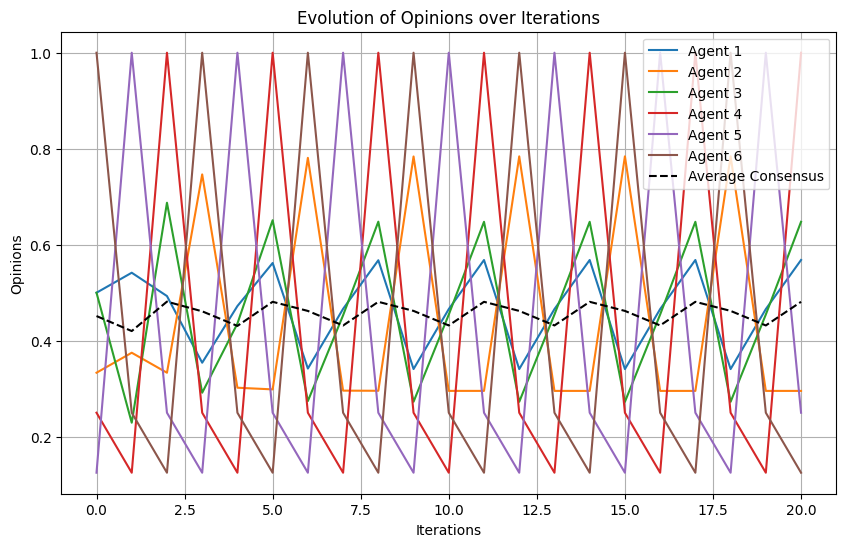

In [11]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[0, 0, 1/3, 0, 1/3, 1/3],
              [1/2, 0, 0, 1/2, 0, 0],
              [0, 1/2, 0, 0, 1/2, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0, 0]
             ])

# Condizioni iniziali degli agenti
x0 = np.array([1/2, 1/3, 1/2, 1/4, 1/8, 1]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 20

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

Come si può notare non si ha mai convergenza, per ottenerla sarà necessario agire 
* con un self loop su un nodo del sink
* oppure rompere l'edge tra il nodo 5 ed il nodo 6.
  
Analizziamo i grafici dei due casi:

### SELF LOOP

POSSIBLE AVERAGE CONSENSUS: 
[[0.593749999999999]
 [0.593749999999999]
 [0.593749999999999]
 [0.593749999999999]
 [0.593749999999999]
 [0.593749999999999]]


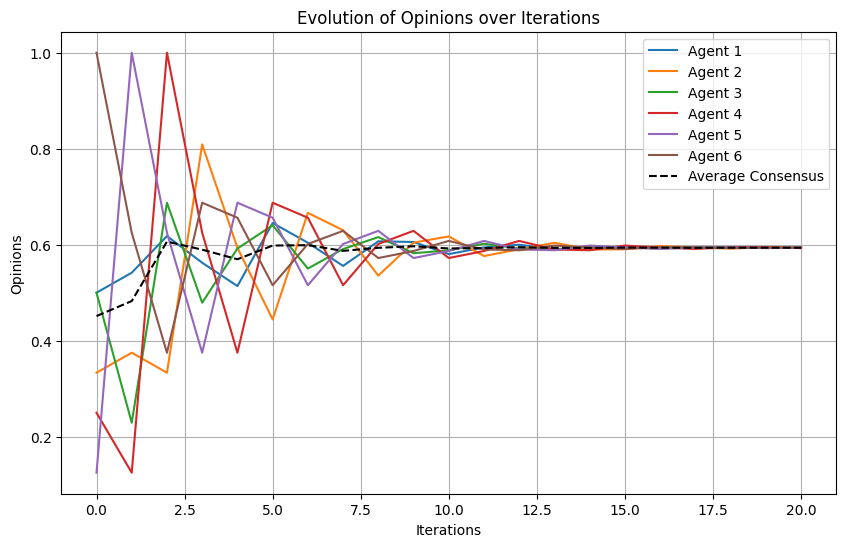

In [12]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[0, 0, 1/3, 0, 1/3, 1/3],
              [1/2, 0, 0, 1/2, 0, 0],
              [0, 1/2, 0, 0, 1/2, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 1/2, 0, 1/2]
             ])

# Condizioni iniziali degli agenti
x0 = np.array([1/2, 1/3, 1/2, 1/4, 1/8, 1]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 20

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()

### ROTTURA EDGE TRA IL NODO 5 ED IL 6


POSSIBLE AVERAGE CONSENSUS: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


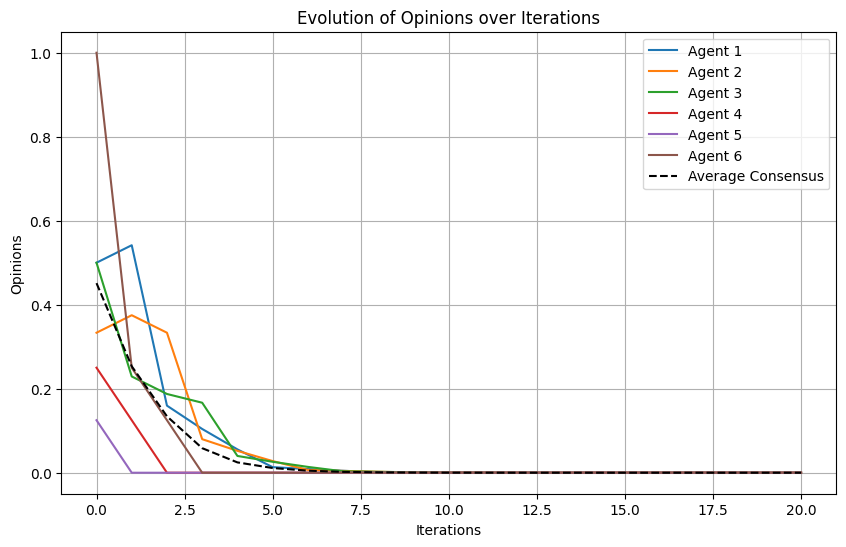

In [13]:
# Definizione della matrice di adiacenza (rappresenta l'influenza tra agenti)
W = np.array([[0, 0, 1/3, 0, 1/3, 1/3],
              [1/2, 0, 0, 1/2, 0, 0],
              [0, 1/2, 0, 0, 1/2, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0]
             ])

# Condizioni iniziali degli agenti
x0 = np.array([1/2, 1/3, 1/2, 1/4, 1/8, 1]).reshape(-1, 1)

# Numero di iterazioni
num_iterations = 20

# Otteniamo le opinioni consensuali finali ed eseguiamo la cronologia delle opinioni
final_opinions, opinions_history = french_degroot_model(W, x0, num_iterations)

# Plotting
plt.figure(figsize=(10, 6))

# Plot delle opinioni di ogni agente
for i in range(len(x0)):
    plt.plot(opinions_history[:, i], label=f'Agent {i+1}')

# Calcoliamo e plottiamo l'average consensus
average_consensus = compute_average_consensus(W, x0, num_iterations)
#plt.plot(np.tile(np.mean(average_consensus), (num_iterations, 1)), label='Average Consensus', linestyle='--', color='black')

average_opinions = np.mean(opinions_history, axis=1)
plt.plot(average_opinions, label='Average Consensus', linestyle='--', color='black')

plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.title('Evolution of Opinions over Iterations')
plt.legend()
plt.grid(True)
plt.show()